In [69]:
%matplotlib inline
# first we ingest the data from the source on the web
# this contains a reduced version of the data set from Lending Club
import pandas as pd
import numpy as np
LD = pd.read_csv('/home/sophie/projects/LendingClub/data/loansData.csv')

### Removing % signs from an Interest Rate and changing data type

In [70]:
#removing % signs from rates
LD['Interest.Rate']=LD['Interest.Rate'].replace('%','',regex=True).astype('float')/100
print LD['Interest.Rate'][0:5]

81174    0.0890
99592    0.1212
80059    0.2198
15825    0.0999
33182    0.1171
Name: Interest.Rate, dtype: float64



### Removing words from a column and converting to an Integer


In [71]:
#removing the word ” months" from loan length.
LD['Loan.Length'] = LD['Loan.Length'].replace(' months','',regex=True).astype(int)
print LD['Loan.Length'][0:5]

81174    36
99592    36
80059    60
15825    36
33182    36
Name: Loan.Length, dtype: int64




### Removing Nans from numerical data



In [72]:
#tried putting several columns in brackets but didn't work
newLD=LD[LD['Open.CREDIT.Lines'].isnull()]

#Here are where the nans are!
print newLD


        Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  \
101596              5000                      4525.0         0.0743   
101515              3500                       225.0         0.1028   

        Loan.Length Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
101596           36        other                   1%    NY           NONE   
101515           36        other                  10%    NY           RENT   

        Monthly.Income FICO.Range  Open.CREDIT.Lines  \
101596             NaN    800-804                NaN   
101515         15000.0    685-689                NaN   

        Revolving.CREDIT.Balance  Inquiries.in.the.Last.6.Months  \
101596                       NaN                             NaN   
101515                       NaN                             NaN   

       Employment.Length  
101596          < 1 year  
101515          < 1 year  



### Drop the nans and save as a new DataFrame


In [73]:
#try dropping the null values. The output below is the frame without the null values. You have to put it into a new
#dataframe!!
nonan=LD.dropna()

newLD=nonan[nonan['Open.CREDIT.Lines'].isnull()]

#newLD has nothing in it!
print newLD

Empty DataFrame
Columns: [Amount.Requested, Amount.Funded.By.Investors, Interest.Rate, Loan.Length, Loan.Purpose, Debt.To.Income.Ratio, State, Home.Ownership, Monthly.Income, FICO.Range, Open.CREDIT.Lines, Revolving.CREDIT.Balance, Inquiries.in.the.Last.6.Months, Employment.Length]
Index: []



### Remove values over the 95th Percentile, saving as a new DataFrame


In [74]:
columns=['Amount.Requested','Amount.Funded.By.Investors','Monthly.Income','Open.CREDIT.Lines'\
,'Revolving.CREDIT.Balance','Inquiries.in.the.Last.6.Months','Interest.Rate']
p = np.percentile(nonan[columns], 95, axis=0) # axis=0, compute over each of the seperate columns.

#Just to check np.percentile is doing what we think it is doing
print nonan[columns[0:3]].describe(percentiles=[0.05,0.5,0.95])
print p

       Amount.Requested  Amount.Funded.By.Investors  Monthly.Income
count       2498.000000                 2498.000000     2498.000000
mean       12413.030424                12009.280661     5685.203911
std         7801.222483                 7743.387861     3959.527984
min         1000.000000                   -0.010000      588.500000
5%          2863.750000                 2221.250000     2165.669500
50%        10000.000000                10000.000000     5000.000000
95%        28000.000000                27925.000000    11666.670000
max        35000.000000                35000.000000   102750.000000
[  2.80000000e+04   2.79250000e+04   1.16666700e+04   1.80000000e+01
   4.07887500e+04   3.00000000e+00   2.04900000e-01]


In [75]:
#conditional that each column only contains < 95th percentile data. 95ths stored in p.
#Is there a way to loop this? Or in one line?
no_outliers = nonan[(nonan[columns[0]] < p[0]) & (nonan[columns[1]] < p[1]) & \
(nonan[columns[2]] < p[2]) & (nonan[columns[3]] < p[3]) & (nonan[columns[4]] < p[4]) & (nonan[columns[5]] < p[5])]

print p

#shows the different before and after the 95th percentile is applied.
print nonan[columns].max()
print no_outliers[columns].max()

[  2.80000000e+04   2.79250000e+04   1.16666700e+04   1.80000000e+01
   4.07887500e+04   3.00000000e+00   2.04900000e-01]
Amount.Requested                   35000.0000
Amount.Funded.By.Investors         35000.0000
Monthly.Income                    102750.0000
Open.CREDIT.Lines                     38.0000
Revolving.CREDIT.Balance          270800.0000
Inquiries.in.the.Last.6.Months         9.0000
Interest.Rate                          0.2489
dtype: float64
Amount.Requested                  27825.000
Amount.Funded.By.Investors        27825.000
Monthly.Income                    11500.000
Open.CREDIT.Lines                    17.000
Revolving.CREDIT.Balance          40267.000
Inquiries.in.the.Last.6.Months        2.000
Interest.Rate                         0.242
dtype: float64


In [76]:
#no of non-nan entries to begin with
print LD.count()

#Used dropna() to clear out the newLD array which had only the rows with an NA in them
print newLD[columns].count()


Amount.Requested                  2500
Amount.Funded.By.Investors        2500
Interest.Rate                     2500
Loan.Length                       2500
Loan.Purpose                      2500
Debt.To.Income.Ratio              2500
State                             2500
Home.Ownership                    2500
Monthly.Income                    2499
FICO.Range                        2500
Open.CREDIT.Lines                 2498
Revolving.CREDIT.Balance          2498
Inquiries.in.the.Last.6.Months    2498
Employment.Length                 2500
dtype: int64
Amount.Requested                  0
Amount.Funded.By.Investors        0
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Interest.Rate                     0
dtype: int64


In [77]:
#nonan is LD without nans
print nonan[columns].count()

Amount.Requested                  2498
Amount.Funded.By.Investors        2498
Monthly.Income                    2498
Open.CREDIT.Lines                 2498
Revolving.CREDIT.Balance          2498
Inquiries.in.the.Last.6.Months    2498
Interest.Rate                     2498
dtype: int64


In [78]:
#Anything outside 95% is dropped from numerical columns
print no_outliers[columns].count()

Amount.Requested                  1867
Amount.Funded.By.Investors        1867
Monthly.Income                    1867
Open.CREDIT.Lines                 1867
Revolving.CREDIT.Balance          1867
Inquiries.in.the.Last.6.Months    1867
Interest.Rate                     1867
dtype: int64


#### Change FICO range into just one number to be used in the next notebook!

In [79]:
#Split up FICO.Range
no_outliers['FICO.Score'],no_outliers['FICO.End']=zip(*no_outliers['FICO.Range'].apply(lambda x: x.split('-',1)))

# This drops several columns at the same time.
no_outliers.drop(no_outliers[['FICO.End', 'FICO.Range']], axis=1, inplace=True)

/home/sophie/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/sophie/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [82]:
#Convert FICO.Score to an integer
no_outliers['FICO.Score'].astype(int)

81174     735
99592     715
15825     695
33182     695
62403     670
48808     720
76404     685
15867     715
94971     670
36911     665
53853     725
21399     730
23446     740
44987     730
17977     760
86099     665
28798     665
24168     695
10356     670
46027     705
2238      675
65278     675
4227      765
50182     760
46120     685
94582     685
457       675
96536     780
39591     720
54619     715
         ... 
8692      685
94839     720
86117     720
14044     690
43056     735
45424     755
92038     670
21716     730
22132     755
84265     665
102514    650
78618     660
86953     675
80129     675
38247     725
91245     680
53041     760
63051     810
68628     675
98758     690
13070     765
45836     665
48243     685
42124     710
78043     720
925       710
49957     685
55610     680
38576     675
3116      670
Name: FICO.Score, dtype: int64


### Now to save output in a csv to be used again..


In [65]:

#IMPORTANT to include index=False. This is automatically set to true and will turn your first column into index
#numbers for the rest of the columns
no_outliers.to_csv('/home/sophie/projects/LendingClub/data/clean_LD.csv', index=False)

In [66]:
cleanLD = pd.read_csv('/home/sophie/projects/LendingClub/data/clean_LD.csv')

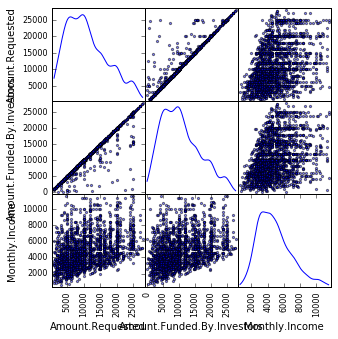

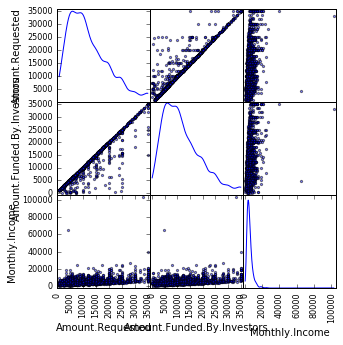

In [67]:
from pandas.tools.plotting import scatter_matrix

_ = scatter_matrix(cleanLD[columns[0:3]], alpha=0.5, figsize=(5,5),diagonal='kde')

_ = scatter_matrix(LD[columns[0:3]], alpha=0.5, figsize=(5,5),diagonal='kde')

#Can see much clearer signals in the cleaned up data (1st panel). Monthly.Income distribution looks much healthier